# Getting Started
This notebook is for a short demonstration of Python for statistics.

The notebook covers the following points:
- Generating random numbers
- Probability distributions
- Curve fitting
- Simple statistical anlysis with NetCDF files

## Import Python modules


In [1]:
# Special '%matplotlib inline' command should go first, before the matplotlib import
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats  as stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import time
from datetime import datetime, timedelta
from pathlib import Path

## Random numbers

In [5]:
# Get a random integer in the specified range
np.random.randint(0, 10)  

6

In [6]:
# Get a random element from a sequence
np.random.choice([2, 4, 6, 9])

9

In [7]:
# Get a random real number between 0 and 1
np.random.random()  

0.5944280295416532

In [8]:
# Get a random real number in the specified range
np.random.uniform(0, 10)  

4.184932018729219

## Probability distributions

https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

In [9]:
np.random.seed(122)   # Set the seed to an arbitrary value Set the 

[np.random.uniform(0,10) for x in range(6)]

[1.569918378916666,
 7.022100424924458,
 2.614782663912485,
 4.517129080114671,
 4.080652648079488,
 6.1154121111339945]

gaussian distribution with mean = 2.0, and a standard deviation of 1.0:

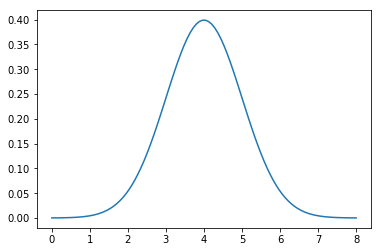

In [10]:
gaussian = stats.norm(loc=4.0, scale=1.0)
x = np.linspace(0.0, 8.0, 100)
y = gaussian.pdf(x)
plt.plot(x,y);

Cumulative distribution

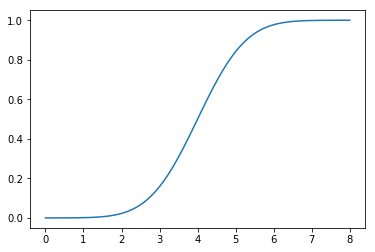

In [11]:
z = gaussian.cdf(x)
plt.plot(x,z);

For hypothesis testing, one often needs the p-value. For example, for the given gaussian distribution above, what would be the x-value so that P(X <= x) = 0.95?

In [12]:
gaussian.ppf(0.95)

5.644853626951472

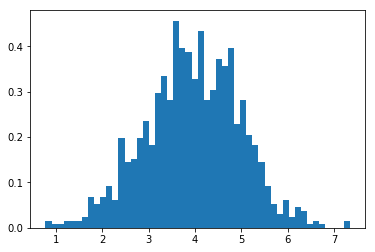

In [13]:
x = gaussian.rvs(1000);
# density --> If True, the first element of the return tuple will be the counts normalized to form a probability density,
# i.e., the area (or integral) under the histogram will sum to 1.
plt.hist(x, bins=50, density=True); 


## Curve fitting

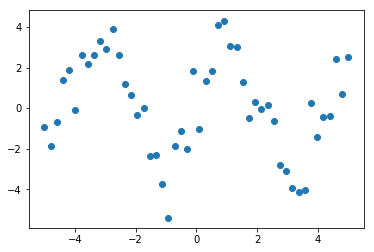

In [14]:
# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# And plot it
plt.figure(figsize=(6, 4));
plt.scatter(x_data, y_data);

In [15]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params); # param[0] and param[1] are the mean and the standard deviation

[3.05931973 1.45754553]


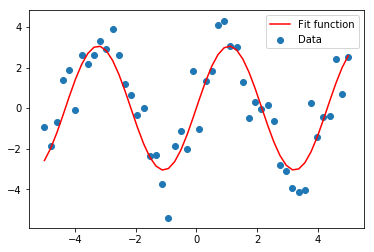

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fit function', color='r')

plt.legend(loc='best')

plt.show()

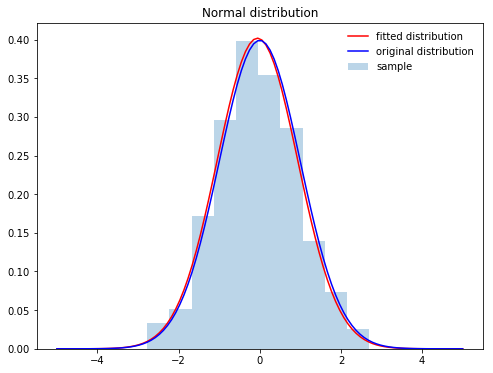

In [17]:
from scipy.stats import norm

# picking 500 of from a normal distrubution
# with mean 0 and standard deviation 1
samp = norm.rvs(loc=0, scale=True, size=500)  # rvs --> Random variates

param = norm.fit(samp) # distribution fitting

# generate 100 numbers between -5 and 5
x = np.linspace(-5, 5, 100)

# fitted distribution
pdf_fitted = norm.pdf(x, loc=param[0], scale=param[1])

# original distribution
pdf = norm.pdf(x)

plt.figure(figsize=(8, 6))
plt.title('Normal distribution')
plt.plot(x, pdf_fitted, 'r-', label='fitted distribution')
plt.plot(x, pdf, 'b-', label='original distribution')
plt.hist(samp, density=True, alpha=.3, label='sample')
plt.legend(loc='best', frameon=False)
plt.show()

# Exploring NetCDF data

In [18]:
import netCDF4

# Read dataset

This uses the pathlib.Path class, which can make working with filenames, directories and paths overall slightly more convenient

In [19]:
directory = Path("../../_data")
directory /= "cmip5/rcp85/Amon/pr/HadGEM2-ES/r1i1p1"
path = directory / "pr_Amon_HadGEM2-ES_rcp85_r1i1p1_200512-203011.nc"
dataset = netCDF4.Dataset(path, "r")

# Discover the data

A dataset when listed at the end of a cell already shows a lot of information.

In [20]:
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    institution: Met Office Hadley Centre, Fitzroy Road, Exeter, Devon, EX1 3PB, UK, (http://www.metoffice.gov.uk)
    institute_id: MOHC
    experiment_id: rcp85
    source: HadGEM2-ES (2009) atmosphere: HadGAM2 (N96L38); ocean: HadGOM2 (lat: 1.0-0.3 lon: 1.0 L40); land-surface/vegetation: MOSES2 and TRIFFID; tropospheric chemistry: UKCA; ocean biogeochemistry: diat-HadOCC
    model_id: HadGEM2-ES
    forcing: GHG, SA, Oz, LU, Sl, Vl, BC, OC, (GHG = CO2, N2O, CH4, CFCs)
    parent_experiment_id: historical
    parent_experiment_rip: r1i1p1
    branch_time: 52560.0
    contact: chris.d.jones@metoffice.gov.uk, michael.sanderson@metoffice.gov.uk
    history: MOHC pp to CMOR/NetCDF convertor (version 1.6.3) 2011-02-28T15:31:19Z CMOR rewrote data to comply with CF standards and CMIP5 requirements.
    references: Bellouin N. et al, (2007) Improved representation of aerosols for HadGEM2. Meteoro

Below, we access some variables separately

In [21]:
pr = dataset['pr']
lat = dataset['lat']
lon = dataset['lon']
time = netCDF4.num2date(dataset['time'][:], dataset['time'].units)

In [22]:
time[0]

datetime.datetime(2003, 11, 11, 0, 0)

In [23]:
# Shows a tuple of a 1-element tuples, one for each shape
time.shape, lat.shape, lon.shape

((300,), (145,), (192,))

In [24]:
# pr_Amon_HadGEM2-ES_rcp85_r1i1p1_200512-203011.nc
# 2005 December to 2030 November
pr.shape, pr.size, "Number of months = " + str((2030-2005)*12)

((300, 145, 192), 8352000, 'Number of months = 300')

# Getting the actual data
To access the actual data from a dataset as a NumPy array, we need to actually access and copy the data, using the `[:]` operation.
All variables above, `pr`, `lat`, `lon` and `time`, are still netCDF *variables*, not arrays. This has the convenience that we can directly access their netCDF attributes, and we avoid reading the full data into memory. The disadvantage is that we can't use them fully as a NumPy array. The code below tries to show the difference.

In [25]:
pr.ncattrs()

['standard_name',
 'long_name',
 'comment',
 'units',
 'original_name',
 'history',
 'cell_methods',
 'cell_measures',
 'missing_value',
 '_FillValue',
 'associated_files']

In [26]:
pr.units

'kg m-2 s-1'

Trying to use it as a NumPy array will not work:

In [27]:
try:
    pr.max()
except AttributeError as exc:
    print(exc)

NetCDF: Attribute not found


But, if we, or the function, *requires* the data to be an array, it does work, since `np.max` takes an array.
This also forces the data to be read into memory. (Under the hood, the data will be copied somewhere.)

Usually, leaving `pr` and friends as a netCDF variable works for a lot of functionality.

In [28]:
np.max(pr)

0.0010691792

`pr` itself is still a netCDF variable

In [29]:
pr

<class 'netCDF4._netCDF4.Variable'>
float32 pr(time, lat, lon)
    standard_name: precipitation_flux
    long_name: Precipitation
    comment: at surface; includes both liquid and solid phases from all types of clouds (both large-scale and convective)
    units: kg m-2 s-1
    original_name: mo: m01s05i216
    history: 2011-02-28T15:31:19 out-of-bounds adjustments: (-1e-07 <= x < 0.0) => set to 0.0 2011-02-28T15:31:19Z altered by CMOR: replaced missing value flag (-1.07374e+09) with standard missing value (1e+20).
    cell_methods: time: mean
    cell_measures: area: areacella
    missing_value: 1e+20
    _FillValue: 1e+20
    associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_HadGEM2-ES_rcp85_r0i0p0.nc areacella: areacella_fx_HadGEM2-ES_rcp85_r0i0p0.nc
unlimited dimensions: time
current shape = (300, 145, 192)
filling on

We now *permanently* turn `pr` into a NumPy array, by forcing a copy. Note that `[:]` also works for multi-dimensional variables.  
We lose all the netCDF variables attributes and methods for it, but gain the NumPy ones.

In [30]:
pr = pr[:]

`pr` is now a NumPy array. A masked array, since there may be missing values.

In [31]:
pr

masked_array(
  data=[[[1.76386698e-06, 1.76386698e-06, 1.76386698e-06, ...,
          1.76386698e-06, 1.76386698e-06, 1.76386698e-06],
         [2.04837920e-06, 2.14069132e-06, 2.13187673e-06, ...,
          1.65557469e-06, 1.80736401e-06, 1.96021051e-06],
         [2.05310198e-06, 2.27162241e-06, 2.32017283e-06, ...,
          1.38557846e-06, 1.64944765e-06, 1.87075227e-06],
         ...,
         [1.41251139e-05, 1.43893039e-05, 1.48197278e-05, ...,
          1.37879242e-05, 1.39740168e-05, 1.41550045e-05],
         [1.55145772e-05, 1.58311323e-05, 1.60279651e-05, ...,
          1.46869634e-05, 1.50251362e-05, 1.52777848e-05],
         [1.30858843e-05, 1.30858843e-05, 1.30858843e-05, ...,
          1.30858843e-05, 1.30858843e-05, 1.30858843e-05]],

        [[1.86370448e-06, 1.86370448e-06, 1.86370448e-06, ...,
          1.86370448e-06, 1.86370448e-06, 1.86370448e-06],
         [1.64091261e-06, 1.75420507e-06, 1.69884390e-06, ...,
          1.80549785e-06, 1.62765446e-06, 1.59435172e

There is one problem with the above `pr = pr[:]` assignment: if we nog go back a few cells in our notebook, where `pr` was still a netCDF variable, these cells won't work (apart from some functionality that NumPy arrays and netCDF variables have in common): our `pr` Python variable has changed type (and value, essentially). We would have to reassign `pr` to `dataset.variables['pr']` again for things to work normally.  
So be careful with reassigning variable names in notebooks in general: it will likely make your notebook less 
interactive, and more (forced) linear.

Let's reset `pr` to be a variable, and use that instead of the NumPy array in our further analysis

In [32]:
pr = dataset['pr']

### Getting percentile values

In [33]:
np.percentile(pr, 99), np.max(pr), np.percentile(pr, 1), np.min(pr)

(0.00019958691496867642, 0.0010691792, 1.860755755700439e-08, 0.0)

## Plotting the data

In [34]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [35]:
# import cartopy.crs as ccrs
# import cartopy.io.shapereader as shpreader
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

Find an interesting date

In [36]:
time[178]

datetime.datetime(2018, 6, 25, 0, 0)

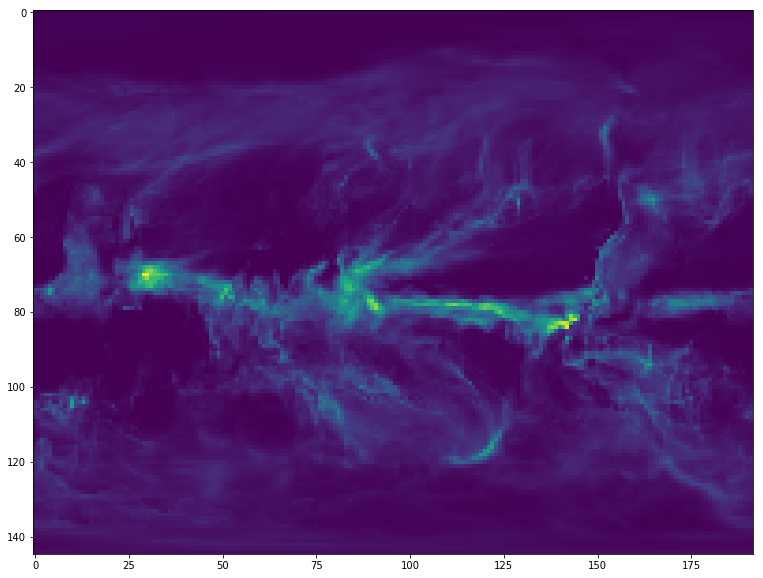

In [37]:
plt.figure(figsize=(20, 10))
plt.imshow(pr[178,:,:]);

## Fit 2D gaussian

In [38]:
print(np.ndim(pr[178,:,:]))
pr[178,0:5,0:5]

2


masked_array(
  data=[[2.2872891e-06, 2.2872891e-06, 2.2872891e-06, 2.2872891e-06,
         2.2872891e-06],
        [3.7628658e-06, 3.7625884e-06, 3.7635332e-06, 3.7571242e-06,
         3.7514221e-06],
        [4.4564758e-06, 4.4528756e-06, 4.4187018e-06, 4.3957530e-06,
         4.3690616e-06],
        [4.6522573e-06, 4.5426568e-06, 4.4379576e-06, 4.3772234e-06,
         4.3767768e-06],
        [4.6201067e-06, 4.4371209e-06, 4.3044529e-06, 4.1968519e-06,
         4.1404483e-06]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

original: (3, 1, 0.5) 
fitted: [2.99607571 0.99869196 0.49719012]


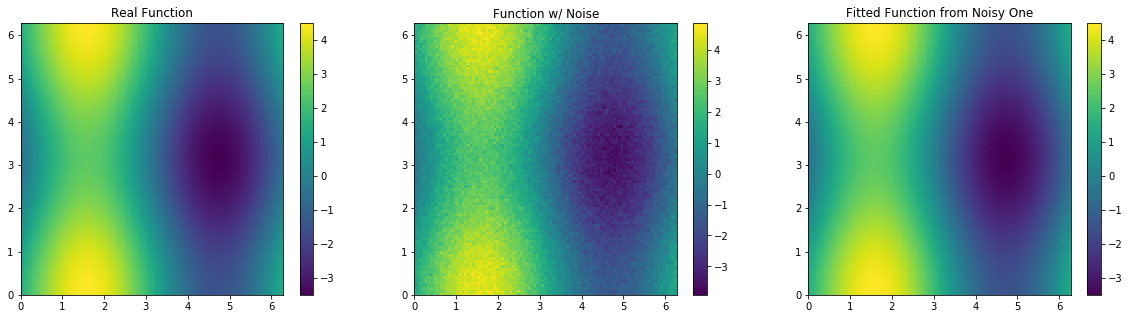

In [39]:
# curvefit with non linear least squares (curve_fit function)
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.sin(x[0]) + b * np.cos(x[1]) + c

limits = [0, 2*np.pi, 0, 2*np.pi]  # [x1_min, x1_max, x2_min, x2_max]
side_x = np.linspace(limits[0], limits[1], 100)
side_y = np.linspace(limits[2], limits[3], 100)
X1, X2 = np.meshgrid(side_x, side_y)
size = X1.shape
x1_1d = X1.reshape((1, np.prod(size)))
x2_1d = X2.reshape((1, np.prod(size)))

xdata = np.vstack((x1_1d, x2_1d))
original = (3, 1, 0.5)
z = func(xdata, *original)
Z = z.reshape(size)
z_noise = z + .2*np.random.randn(len(z))
Z_noise = z_noise.reshape(size)

ydata = z_noise
popt, pcov = curve_fit(func, xdata, ydata)
# Python 3.6 & later f-strings: insert variables directly inside a string with {variable_name}
print (f"original: {original} \nfitted: {popt}")
z_fit = func(xdata, *popt)
Z_fit = z_fit.reshape(size)

# Plot it
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title("Real Function")
plt.pcolormesh(X1, X2, Z)
plt.axis(limits)
plt.colorbar()
plt.subplot(1, 3, 2)
plt.title("Function w/ Noise")
plt.pcolormesh(X1, X2, Z_noise)
plt.axis(limits)
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Fitted Function from Noisy One")
plt.pcolormesh(X1, X2, Z_fit)
plt.axis(limits)
plt.colorbar()

plt.show()

## Extreme cases

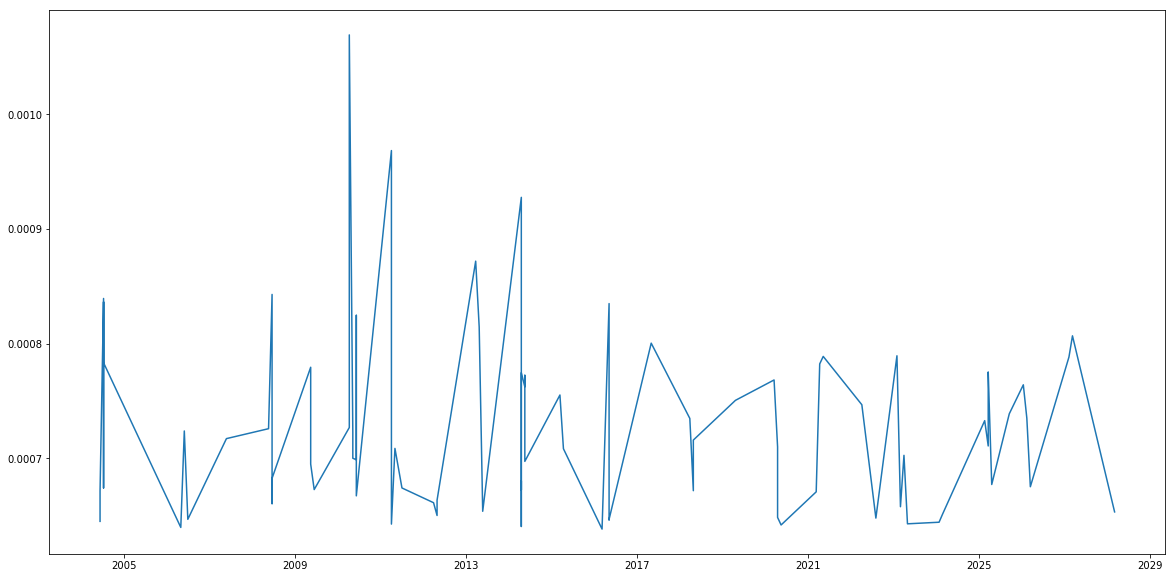

In [40]:
indices = pr > np.percentile(pr, 99.999)
# Note: need pr[:] here, since indices will be 3-dimensional, 
# which does not work for a netCDF variable
extreme_values = pr[:][indices]
ind_dates = np.ma.where(pr > np.percentile(pr, 99.999))[0]

extreme_dates = time[ind_dates]
plt.figure(figsize=(20, 10))
plt.plot(extreme_dates, extreme_values);

## Change over the years

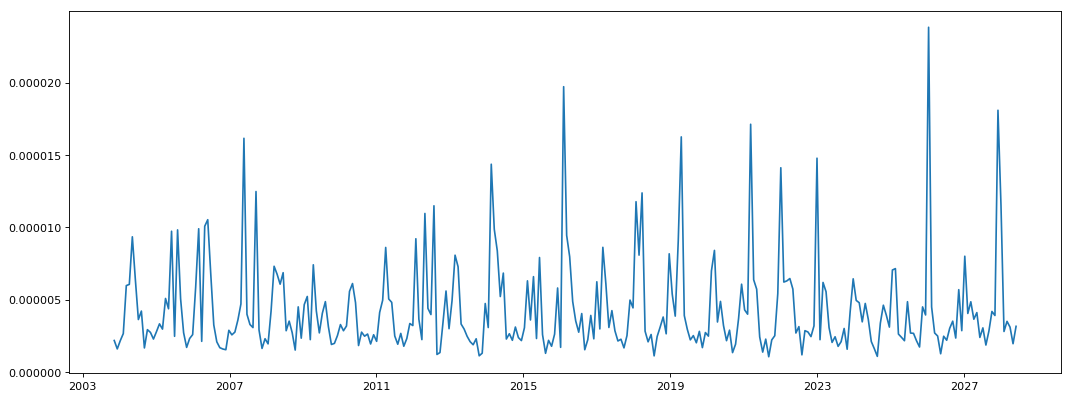

In [41]:
fig = plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time, pr[:, 50, 3])
plt.show();

# Save and close

In [42]:
dataset.close()